# Behavior of $n| \text{Var}[R^{\Phi \mathcal{X}}]-\text{Var}[R^T]|$ as $n$ grows and $d$ growing at different speeds in terms of $n$

The difference in variance is computed using the formula from Lemma 42(i):

 $$
    n \,\big| \text{Var}[R^{\Phi\mathcal{X}}] - \text{Var}[R^T] \big| \;=\; n \, \bigg| d^2\sigma^4 \tilde \lambda^4 \text{Var}\bigg[ \frac{1}{(\tilde \lambda + \sigma^2 \chi^2_n/n)^2} \bigg] - \frac{8 d^2 \sigma^8 \tilde \lambda^4}{n (\tilde \lambda + \sigma^2)^6} \bigg| \;,
 $$

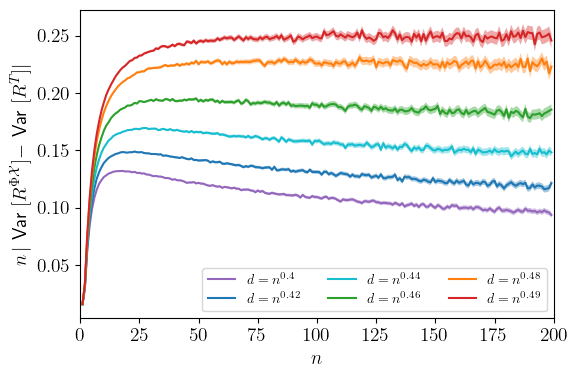

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from matplotlib import colors
import scipy.stats

np.random.seed(0)
sim_size = 100000000
chi_ppf = np.array([scipy.stats.chi2.ppf(1-0.05/2, sim_size-1), scipy.stats.chi2.ppf(0.05/2, sim_size-1)])

lamb = 1
sig = 1
alpha_list = [ 0.4, 0.42, 0.44, 0.46, 0.48, 0.49 ]
color_list = [ "tab:purple", "tab:blue", "tab:cyan", "tab:green", "tab:orange", "tab:red"]
n_list = range(1,200,1)

plt.rcParams.update({ 
    "text.usetex": True,
    "font.weight": "heavy",
    "font.size": 14
})
fig = plt.figure(figsize=(6, 4), dpi=100)

for alpha, color in zip(alpha_list, color_list):
    var_diff_list = []
    var_ci_list = []
    for n in n_list:
        print('alpha='+str(alpha)+';n='+str(n),end='\r')
        d = n**(alpha)
        chi_list = np.random.chisquare(n, sim_size)
        var_phix = d**2 * sig**4 * lamb**4 * np.var( 1/((lamb + sig**2 * chi_list / n)**2), ddof=1)
        var_T = 8 * d**2 * sig**8 * lamb**4 / (n * (lamb + sig**2)**6) 
        var_diff_list.append(n*np.abs(var_phix - var_T))
        
        ci_no_abs = (sim_size-1) * var_phix  / chi_ppf - var_T # conf interval for signed difference of variance
        if ci_no_abs[0] * ci_no_abs[1] > 0: # if both ends of ci_no_bas take the same sign, taking abs of the same ci gives a conservative 95% ci for the abs diff of variance
            ci = np.abs(ci_no_abs)
        else: # lower end negative, upper end positive; lower end fixed at zero and upper end becomes the larger value of ci_no_abs[1] and -ci_no_abs[0]
            ci = [0, max(ci_no_abs[1], -ci_no_abs[0])]   
        var_ci_list.append(n*ci) # finally scale by n
                             
    plt.plot(n_list, var_diff_list, label=r'$d=n^{' + str(alpha) + '}$', color=color)
    fill_color = np.array(colors.to_rgba(color))
    fill_color[3] *= 0.4   
    plt.fill_between(n_list, [ci[0] for ci in var_ci_list], [ci[1] for ci in var_ci_list], facecolor=fill_color)

plt.legend(loc='lower right', prop={'size': 10}, ncol=3)
plt.ylabel(r'$n \, | $ Var $[R^{\Phi \mathcal{X}}] - $ Var $[R^T]| $')
plt.xlabel(r'$n$')
plt.xlim([0, 200])

plt.tight_layout()
plt.savefig('fig6_simulation_diff_var.pdf', dpi=fig.dpi, bbox_inches='tight')
plt.show()